In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

predictions_path = r"../src/predictions.csv"
dataset_path = r"../../data/merged_dataset.csv"

In [3]:
# Metadata
df1 = pd.read_csv(dataset_path, encoding='latin-1')
df1.head()

,Unnamed: 0,filename,pit,sex,length,spawning,date,dataset,recap,Period,dayseq,area,crypto,skade
0,0,201506_l_0.jpg,201506,f,137.0,0.0,2019-10-29,LabMain,NaN,Oct,NaN,NaN,NaN,NaN
1,1,201506_l_1.jpg,201506,f,138.0,0.0,2020-05-02,LabMain,NaN,May,NaN,NaN,NaN,NaN
2,2,201506_r_0.jpg,201506,f,137.0,0.0,2019-10-29,LabMain,NaN,Oct,NaN,NaN,NaN,NaN
3,3,201506_r_1.jpg,201506,f,138.0,0.0,2020-05-02,LabMain,NaN,May,NaN,NaN,NaN,NaN
4,4,201934_r_0.jpg,201934,m,220.0,NaN,2019-10-01,Pier,NaN,0,NaN,NaN,NaN,NaN


In [3]:
# Predictions
df2 = pd.read_csv(predictions_path, encoding='utf-8')
df2["filename"] = df2["filename"].apply(lambda x: x + ".jpg")
df2.head()

,filename,p1,p2,p3,p4,p5,p6,p7,p8,p9,...,p2443,p2444,p2445,p2446,support_filename,query_filename,correct_filename,support_filename_at_correct,rank,y
0,201506_l_0.jpg,829,829,124,222,1,1,124,349,124,...,145,339,145,145,433867_l_1,201506_l_0,201506_l_6,201506_l_6,5,1
1,201506_l_2.jpg,124,124,124,124,124,222,1,1,222,...,372,317,0,365,420885_l_2,201506_l_2,201506_l_4,201506_l_4,7,1
2,201506_l_3.jpg,124,1,124,1,124,371,829,222,124,...,176,270,270,270,420885_l_2,201506_l_3,201506_l_4,201506_l_4,2,1
3,201506_l_5.jpg,1,81,81,1,536,81,1,124,484,...,415,274,190,320,201506_l_4,201506_l_5,201506_l_4,201506_l_4,1,1
4,201506_r_2.jpg,262,262,0,0,0,0,262,0,262,...,294,335,226,335,421660_r_3,201506_r_2,201506_r_4,201506_r_4,3,0


In [4]:
# Metadata and predictions combined,
df = df1.merge(df2, left_on='dir_filename', right_on='filename')
df.head()

,pit,lÃ¸pernummer,species,length,sex,spawning,recap,prefix,photostart,photostop,...,p2443,p2444,p2445,p2446,support_filename,query_filename,correct_filename,support_filename_at_correct,rank,y
0,201506,127.0,grÃ¸nngylt,138.0,f,0.0,NaN,P502,1391,1392.0,...,372,317,0,365,420885_l_2,201506_l_2,201506_l_4,201506_l_4,7,1
1,201506,127.0,grÃ¸nngylt,138.0,f,0.0,NaN,P502,1391,1392.0,...,294,335,226,335,421660_r_3,201506_r_2,201506_r_4,201506_r_4,3,0
2,204295,9216.0,grÃ¸nngylt,132.0,m,0.0,1.0,P703,1554,1555.0,...,765,755,366,33,430999_r_2,204295_r_1,204295_r_0,204295_r_0,67,6
3,204942,238.0,grÃ¸nngylt,147.0,f,2.0,1.0,P5310,512,513.0,...,230,317,230,230,431065_r_0,204942_r_1,204942_r_0,204942_r_0,47,8
4,209526,128.0,grÃ¸nngylt,130.0,f,1.0,1.0,P5300,345,346.0,...,742,249,249,919,430541_r_1,209526_r_2,209526_r_1,209526_r_1,15,14


In [5]:
# Gets the amount of image pairs grouped by period difference

def get_pit_dir(filename):
    """Transforms filename into a tag that contains both pit and direction."""
    basename = os.path.basename(filename)
    pit_dir = "_".join(basename.split("_")[:-1])
    return basename, pit_dir

df_f3 = df1[~df1['Period'].isin(["0", "May", "Oct"])]
df_f3 = df_f3[df_f3['dir_filename'].str.len() > 0]

a = []
b = []
dist = []

for i, row in df_f3.iterrows():
    basename, pit_dir = get_pit_dir(row["dir_filename"])

    if basename in a + b:
        continue

    pit = row["pit"]
    period = float(row["Period"].replace(',', '.'))
    df_sub = df_f3[df_f3["pit"] == pit]

    for i2, row2 in df_sub.iterrows():
        basename2, pit_dir2 = get_pit_dir(row2["dir_filename"])
        if pit_dir2 != pit_dir:
            continue
        if basename == basename2:
            continue
        period2 = float(row2["Period"].replace(',', '.'))
        diff = abs(period - period2)

        a.append(basename)
        b.append(basename2)
        dist.append(diff)

result = np.column_stack([a, b, dist])
unique_total, counts_total = np.unique(result[:,2], return_counts=True)
unique_total = unique_total.astype(np.float)
dict(zip(unique_total, counts_total))

{0.0: 181,
 0.5: 90,
 1.0: 194,
 1.5: 32,
 2.0: 75,
 3.0: 3,
 5.0: 34,
 6.0: 43,
 6.5: 21,
 7.0: 45,
 7.5: 8,
 8.0: 8,
 8.5: 14}

In [6]:
# Filter correct on first try

df_f = df.copy() #df[df["rank"] == 1]
df_f.head()

,pit,lÃ¸pernummer,species,length,sex,spawning,recap,prefix,photostart,photostop,...,p2443,p2444,p2445,p2446,support_filename,query_filename,correct_filename,support_filename_at_correct,rank,y
0,201506,127.0,grÃ¸nngylt,138.0,f,0.0,NaN,P502,1391,1392.0,...,372,317,0,365,420885_l_2,201506_l_2,201506_l_4,201506_l_4,7,1
1,201506,127.0,grÃ¸nngylt,138.0,f,0.0,NaN,P502,1391,1392.0,...,294,335,226,335,421660_r_3,201506_r_2,201506_r_4,201506_r_4,3,0
2,204295,9216.0,grÃ¸nngylt,132.0,m,0.0,1.0,P703,1554,1555.0,...,765,755,366,33,430999_r_2,204295_r_1,204295_r_0,204295_r_0,67,6
3,204942,238.0,grÃ¸nngylt,147.0,f,2.0,1.0,P5310,512,513.0,...,230,317,230,230,431065_r_0,204942_r_1,204942_r_0,204942_r_0,47,8
4,209526,128.0,grÃ¸nngylt,130.0,f,1.0,1.0,P5300,345,346.0,...,742,249,249,919,430541_r_1,209526_r_2,209526_r_1,209526_r_1,15,14


In [8]:
# Gets the period for each image

def find_period_support(row):
    filename = row["support_filename"] + ".jpg"
    period = df1[df1["dir_filename"] == filename]["Period"]
    print(period)
    return list(period)[0]


def find_period_query(row):
    filename = row["query_filename"] + ".jpg"
    period = df1[df1["dir_filename"] == filename]["Period"]
    return list(period)[0]


def find_period_correct(row):
    filename = row["correct_filename"] + ".jpg"
    period = df1[df1["dir_filename"] == filename]["Period"]
    return list(period)[0]


def find_period_support_at_correct(row):
    filename = row["support_filename_at_correct"] + ".jpg"
    period = df1[df1["dir_filename"] == filename]["Period"]
    return list(period)[0]


df_f["period_query"] = df_f.apply(find_period_query, axis=1)
df_f["period_support"] = df_f.apply(find_period_support, axis=1)
df_f["period_correct"] = df_f.apply(find_period_correct, axis=1)
df_f["period_support_at_correct"] = df_f.apply(find_period_support_at_correct, axis=1)

df_f

261    4
Name: Period, dtype: object
555    Oct
Name: Period, dtype: object
1327    9
Name: Period, dtype: object
Series([], Name: Period, dtype: object)


IndexError: list index out of range

In [14]:
# Filter out non-numeric periods and calculate difference

df_f2 = df_f[~df_f['period_query'].isin(["0", "May", "Oct"])]
df_f2 = df_f2[~df_f2['period_support'].isin(["0", "May", "Oct"])]
df_f2 = df_f2[~df_f2['period_correct'].isin(["0", "May", "Oct"])]
df_f2 = df_f2[~df_f2['period_support_at_correct'].isin(["0", "May", "Oct"])]

df_f2["period_query"] = df_f2["period_query"].str.replace(',', '.')
df_f2["period_support"] = df_f2["period_support"].str.replace(',', '.')
df_f2["period_correct"] = df_f2["period_correct"].str.replace(',', '.')
df_f2["period_support_at_correct"] = df_f2["period_support_at_correct"].str.replace(',', '.')

df_f2 = df_f2.astype({"period_query": float, "period_support": float, "period_correct": float, "period_support_at_correct": float})


def rank1_difference(row):
    if row["rank"] <= 1:
        return np.abs(row["period_query"] - row["period_support"])
    else:
        return np.NaN


def rank5_difference(row):
    if row["rank"] <= 5:
        return np.abs(row["period_query"] - row["period_support_at_correct"])
    else:
        return np.NaN


df_f2["period_difference"] = df_f2.apply(rank1_difference, axis=1)
df_f2["period_difference_5"] = df_f2.apply(rank5_difference, axis=1)
df_f2["correct_difference"] = np.abs(df_f2["period_query"] - df_f2["period_correct"])

df_f2

,pit,lÃ¸pernummer,species,length,sex,spawning,recap,prefix,photostart,photostop,...,support_filename_at_correct,rank,y,period_query,period_support,period_correct,period_support_at_correct,period_difference,period_difference_5,correct_difference
2,202037,7355.0,grÃ¸nngylt,120.0,m,0.0,1.0,_1160,801,802.0,...,202037_r_2,1,4,2.0,3.0,3.0,3.0,1.0,1.0,1.0
3,204295,12011.0,grÃ¸nngylt,149.0,m,0.0,1.0,P906,1023,1024.0,...,204295_r_1,76,6,4.0,4.0,3.0,3.0,NaN,NaN,1.0
4,209127,25103.0,grÃ¸nngylt,181.0,f,2.0,1.0,P629,3672,3673.0,...,209127_r_2,2,10,10.0,11.0,4.0,4.0,NaN,6.0,6.0
5,209127,11814.0,grÃ¸nngylt,170.0,f,0.0,1.0,P9050,843,844.0,...,209127_l_1,1,9,4.0,10.0,10.0,10.0,6.0,6.0,6.0
6,209526,128.0,grÃ¸nngylt,130.0,f,1.0,1.0,P5300,345,346.0,...,209526_l_3,2,13,2.5,4.0,4.0,4.0,NaN,1.5,1.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,67201,185.0,grÃ¸nngylt,133.0,s,2.0,1.0,P5300,414,415.0,...,67201_l_3,1,997,2.5,2.0,2.0,2.0,0.5,0.5,0.5
446,67201,7519.0,grÃ¸nngylt,133.0,s,0.0,1.0,_1160,996,997.0,...,67201_l_3,1,997,2.0,2.0,2.0,2.0,0.0,0.0,0.0
447,67510,28129.0,grÃ¸nngylt,163.0,f,0.0,1.0,P831,6210,6211.0,...,67510_l_2,4,999,11.0,11.0,2.5,2.5,NaN,8.5,8.5
448,67510,28129.0,grÃ¸nngylt,163.0,f,0.0,1.0,P831,6210,6211.0,...,67510_r_2,1,1000,11.0,2.5,2.5,2.5,8.5,8.5,8.5


In [15]:
count_correct = df_f2.groupby("correct_difference").y.nunique()
count_correct

correct_difference
0.0    71
0.5    30
1.0    84
1.5    11
2.0    31
3.0     1
5.0    14
6.0    16
6.5     6
7.0    19
7.5     2
8.0     4
8.5     3
Name: y, dtype: int64

In [16]:
# Group by period intervals

count_guess = df_f2.groupby("period_difference").y.nunique()
for u in count_correct.index:
    if u not in count_guess.index:
        count_guess[u] = 0
count_guess = count_guess.sort_index()
guesses = count_guess.to_numpy()
count_guess

period_difference
0.0    54
0.5    22
1.0    55
1.5     8
2.0    19
3.0     1
5.0    11
6.0     8
6.5     4
7.0     8
7.5     1
8.0     2
8.5     1
Name: y, dtype: int64

In [17]:
# Group by period intervals, given 5 tries

count_guess_5 = df_f2.groupby("period_difference_5").y.nunique()
for u in count_correct.index:
    if u not in count_guess_5.index:
        count_guess_5[u] = 0
count_guess_5 = count_guess_5.sort_index()
guesses_5 = count_guess_5.to_numpy()
count_guess_5

period_difference_5
0.0    63
0.5    24
1.0    64
1.5     9
2.0    23
3.0     1
5.0    11
6.0    10
6.5     4
7.0    10
7.5     1
8.0     2
8.5     2
Name: y, dtype: int64

In [18]:
# Table of  correct guesses and total guesses

df_overview = pd.DataFrame(np.column_stack([count_correct.index, count_correct.to_numpy(), guesses, guesses_5]), columns=["periode forskjell", "totalt mulige", "riktig på første", "riktig på femte"])
df_overview = df_overview.set_index("periode forskjell")
df_overview.insert(2, "andel", df_overview.apply(lambda row: row["riktig på første"] / row["totalt mulige"], axis=1).round(2))
df_overview["andel@5"] = df_overview.apply(lambda row: row["riktig på femte"] / row["totalt mulige"], axis=1).round(2)
df_overview["totalt mulige"] = df_overview["totalt mulige"].astype(int)
df_overview["riktig på første"] = df_overview["riktig på første"].astype(int)
df_overview["riktig på femte"] = df_overview["riktig på femte"].astype(int)
df_overview

,totalt mulige,riktig på første,andel,riktig på femte,andel@5
periode forskjell,,,,,
0.0,71,54,0.76,63,0.89
0.5,30,22,0.73,24,0.80
1.0,84,55,0.65,64,0.76
1.5,11,8,0.73,9,0.82
2.0,31,19,0.61,23,0.74
3.0,1,1,1.00,1,1.00
5.0,14,11,0.79,11,0.79
6.0,16,8,0.50,10,0.62
6.5,6,4,0.67,4,0.67


In [19]:
acc_1 = df_overview["riktig på første"].sum() / df_overview["totalt mulige"].sum()
acc_5 = df_overview["riktig på femte"].sum() / df_overview["totalt mulige"].sum()
print(acc_1, acc_5)

0.6643835616438356 0.7671232876712328


In [20]:
# Table of database distribution

df_distribution = pd.DataFrame(np.column_stack([unique_total, counts_total]), columns=["periode forskjell", "total i datasett"])
df_distribution = df_distribution.set_index("periode forskjell")
df_distribution["total i datasett"] = df_distribution["total i datasett"].astype(int)
df_distribution

,total i datasett
periode forskjell,
0.0,181
0.5,90
1.0,194
1.5,32
2.0,75
3.0,3
5.0,34
6.0,43
6.5,21


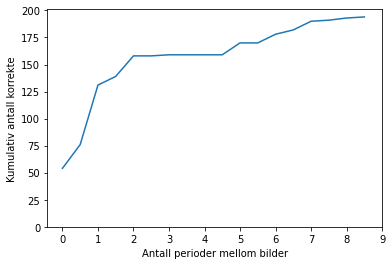

In [21]:
# Plotting the cumulative number of correct given period intervals

x = np.arange(0, 9, 0.5)

count_guess_full = count_guess.copy()
for u in x:
    if u not in count_guess_full.index:
        count_guess_full[u] = 0
count_guess_full = count_guess_full.sort_index()
guess_cum = np.cumsum(count_guess_full.to_numpy())

count_guess_5_full = count_guess_5.copy()
for u in x:
    if u not in count_guess_5_full.index:
        count_guess_5_full[u] = 0
count_guess_5_full = count_guess_5_full.sort_index()
guess_5_cum = np.cumsum(count_guess_5_full.to_numpy())

count_correct_full = count_correct.copy()
for u in x:
    if u not in count_correct_full.index:
        count_correct_full[u] = 0
count_correct_full = count_correct_full.sort_index()
correct_cum = np.cumsum(count_correct_full.to_numpy())

#plt.plot(unique, total_cum)
plt.plot(x, guess_cum)
#plt.plot(x, guess_5_cum)
plt.xlabel("Antall perioder mellom bilder")
plt.ylabel("Kumulativ antall korrekte")
plt.ylim(bottom=0)
plt.xscale("linear")
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.savefig("fig.png")
plt.show()